In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from pydantic import BaseModel
from typing import Optional

from sklearn.metrics import explained_variance_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

%matplotlib inline


In [71]:
df = pd.read_csv("../figures/merged_validation_s.csv")
df.describe()

,Unnamed: 0,X,predicted_counts,prediction_prop,validation_counts,validation_prop
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,195.500000,5.500000,52.425641,0.100000,52.574462,0.100359
std,112.727548,2.875971,123.871579,0.229574,89.530826,0.161600
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,98.250000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,195.500000,5.500000,0.000000,0.000000,6.400000,0.010000
75%,292.750000,8.000000,14.750000,0.035551,80.920000,0.150000
max,390.000000,10.000000,801.000000,0.990698,640.300000,0.950000


In [72]:
df.head()

,Unnamed: 0,X,key,predicted_counts,prediction_prop,validation_counts,validation_prop,site
0,1,1,Abiotic,0,0.000000,30.6,0.05,BisonGulch
1,2,2,Forb,135,0.220588,30.6,0.05,BisonGulch
2,3,3,Graminoid,408,0.666667,0.0,0.00,BisonGulch
3,4,4,Lichen,6,0.009804,30.6,0.05,BisonGulch
4,5,5,Moss,56,0.091503,30.6,0.05,BisonGulch


In [73]:
fg1_levels = df["key"].unique()
print(fg1_levels)

['Abiotic' 'Forb' 'Graminoid' 'Lichen' 'Moss' 'ShrubDecid'
 'ShrubEvergreen' 'TreeBroadleaf' 'TreeConifer' 'Unknown']


In [74]:
encoder = LabelEncoder()
df["site_code"] = encoder.fit_transform(df["site"])

In [75]:
df[["site","site_code"]].value_counts()

site         site_code
EightMile    2            110
Chatanika    1            100
BisonGulch   0             90
twelveMile1  3             50
twelveMile2  4             40
dtype: int64

In [88]:
nodes = df["site_code"].unique()
print(nodes)
print(len(nodes))

colors = ['red', 'blue', 'yellow', 'violet', 'purple']

cmap = ListedColormap(colors, name="sites")

[0 1 2 3 4]
5


In [89]:
df.head(25)

,Unnamed: 0,X,key,predicted_counts,prediction_prop,validation_counts,validation_prop,site,site_code
0,1,1,Abiotic,0,0.000000,30.60,0.05,BisonGulch,0
1,2,2,Forb,135,0.220588,30.60,0.05,BisonGulch,0
2,3,3,Graminoid,408,0.666667,0.00,0.00,BisonGulch,0
3,4,4,Lichen,6,0.009804,30.60,0.05,BisonGulch,0
4,5,5,Moss,56,0.091503,30.60,0.05,BisonGulch,0
5,6,6,ShrubDecid,2,0.003268,367.20,0.60,BisonGulch,0
6,7,7,ShrubEvergreen,5,0.008170,61.20,0.10,BisonGulch,0
7,8,8,TreeBroadleaf,0,0.000000,0.00,0.00,BisonGulch,0
8,9,9,TreeConifer,0,0.000000,61.20,0.10,BisonGulch,0
9,10,10,Unknown,0,0.000000,0.00,0.00,BisonGulch,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


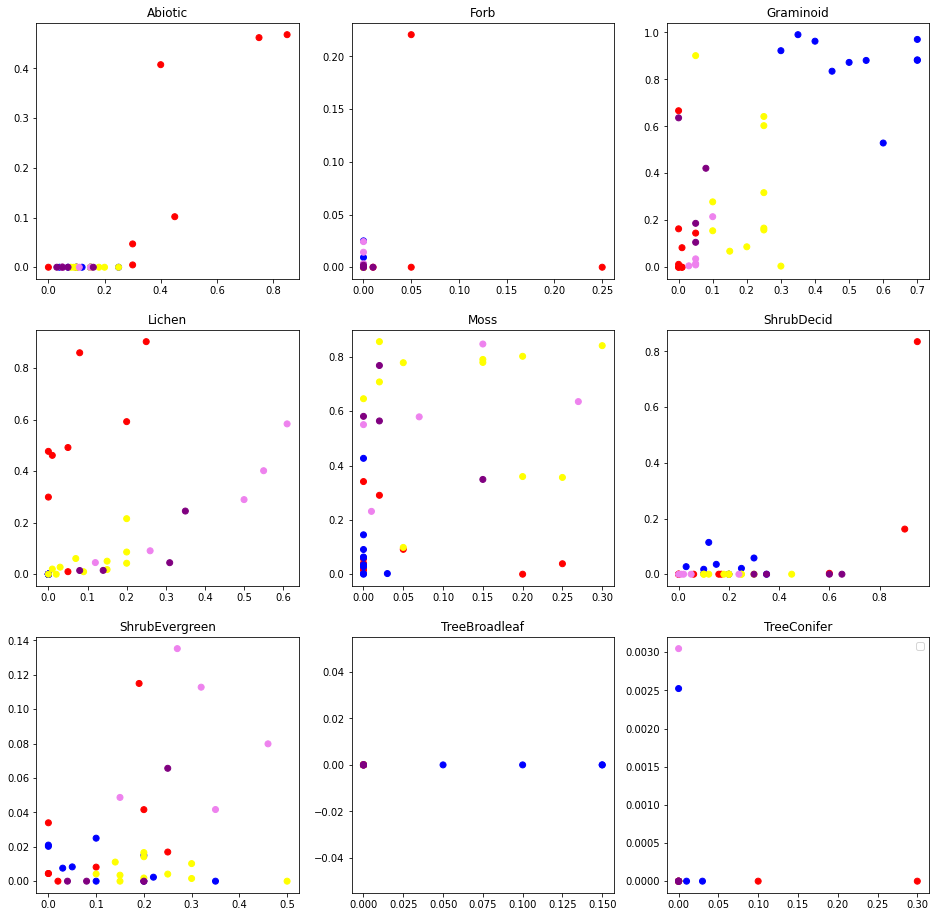

In [90]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16,16))


ax[0][0].scatter(
    df[df["key"]=="Abiotic"]["validation_prop"], 
    df[df["key"]=="Abiotic"]["prediction_prop"],
    c=df[df["key"]=="Abiotic"]["site_code"],
    cmap=cmap)
ax[0][0].set_title("Abiotic")

ax[0][1].scatter(
    df[df["key"]=="Forb"]["validation_prop"], 
    df[df["key"]=="Forb"]["prediction_prop"],
    c=df[df["key"]=="Forb"]["site_code"],
    cmap=cmap)
ax[0][1].set_title("Forb")

ax[0][2].scatter(
    df[df["key"]=="Graminoid"]["validation_prop"], 
    df[df["key"]=="Graminoid"]["prediction_prop"],
    c=df[df["key"]=="Graminoid"]["site_code"],
    cmap = cmap)
ax[0][2].set_title("Graminoid")

ax[1][0].scatter(
    df[df["key"]=="Lichen"]["validation_prop"], 
    df[df["key"]=="Lichen"]["prediction_prop"],
    c=df[df["key"]=="Lichen"]["site_code"],
    cmap = cmap)
ax[1][0].set_title("Lichen")

ax[1][1].scatter(
    df[df["key"]=="Moss"]["validation_prop"], 
    df[df["key"]=="Moss"]["prediction_prop"],
    c=df[df["key"]=="Moss"]["site_code"],
    cmap = cmap)
ax[1][1].set_title("Moss")

ax[1][2].scatter(
    df[df["key"]=="ShrubDecid"]["validation_prop"], 
    df[df["key"]=="ShrubDecid"]["prediction_prop"],
    c=df[df["key"]=="ShrubDecid"]["site_code"],
    cmap = cmap)
ax[1][2].set_title("ShrubDecid")

ax[2][0].scatter(
    df[df["key"]=="ShrubEvergreen"]["validation_prop"], 
    df[df["key"]=="ShrubEvergreen"]["prediction_prop"],
    c=df[df["key"]=="ShrubEvergreen"]["site_code"],
    cmap = cmap)
ax[2][0].set_title("ShrubEvergreen")

ax[2][1].scatter(
    df[df["key"]=="TreeBroadleaf"]["validation_prop"], 
    df[df["key"]=="TreeBroadleaf"]["prediction_prop"],
    c=df[df["key"]=="TreeBroadleaf"]["site_code"],
    cmap = cmap)
ax[2][1].set_title("TreeBroadleaf")

ax[2][2].scatter(
    df[df["key"]=="TreeConifer"]["validation_prop"], 
    df[df["key"]=="TreeConifer"]["prediction_prop"],
    c=df[df["key"]=="TreeConifer"]["site_code"],
    cmap = cmap)
ax[2][2].set_title("TreeConifer")

plt.legend(
    
)

plt.show()


In [79]:
class ValidationResult(BaseModel):
    r2: float
    explained_variance: float
    intercept: float
    slope: float

    

In [80]:
def get_validation_stats(true: pd.Series, pred: pd.Series) -> ValidationResult:
    model = LinearRegression()
    model.fit(pred.values.reshape(-1,1), true.values.reshape(-1,1))
    score = model.score(pred.values.reshape(-1,1), true.values.reshape(-1,1))
    explained_variance = explained_variance_score(true.values.reshape(-1,1), pred.values.reshape(-1,1))
    return ValidationResult(
        r2 = score, 
        explained_variance = explained_variance, 
        intercept = model.intercept_,
        slope = model.coef_
    )

def pretty_print_results(result: ValidationResult, header: Optional[str] = None) -> None:
    indent = ""
    if(header is not None):
        print(header)
        indent = "\t"
    print(f"{indent}R-squared:\t\t{result.r2}")
    print(f"{indent}Explained Variance:\t{result.explained_variance}")
    print(f"{indent}Intercept:\t\t{result.intercept}")
    print(f"{indent}Slope:\t\t\t{result.slope}")


In [81]:
result = get_validation_stats(df[df["key"]=="Abiotic"]["validation_prop"], 
    df[df["key"]=="Abiotic"]["prediction_prop"])

In [82]:
pretty_print_results(result, "Test")

Test
	R-squared:		0.7638942419069581
	Explained Variance:	0.7248235706813437
	Intercept:		0.11982553866492746
	Slope:			1.2922507295805372


In [83]:
abiotic = get_validation_stats(df[df["key"]=="Abiotic"]["validation_prop"], 
    df[df["key"]=="Abiotic"]["prediction_prop"])

forb = get_validation_stats( 
    df[df["key"]=="Forb"]["validation_prop"], 
    df[df["key"]=="Forb"]["prediction_prop"])

graminoid = get_validation_stats(
    df[df["key"]=="Graminoid"]["validation_prop"], 
    df[df["key"]=="Graminoid"]["prediction_prop"],
)

lichen = get_validation_stats(
    df[df["key"]=="Lichen"]["validation_prop"], 
    df[df["key"]=="Lichen"]["prediction_prop"]
)

moss = get_validation_stats(
    df[df["key"]=="Moss"]["validation_prop"], 
    df[df["key"]=="Moss"]["prediction_prop"],
)

shrub_decid = get_validation_stats(
    df[df["key"]=="ShrubDecid"]["validation_prop"], 
    df[df["key"]=="ShrubDecid"]["prediction_prop"]
)

shrub_evergreen = get_validation_stats(
    df[df["key"]=="ShrubEvergreen"]["validation_prop"], 
    df[df["key"]=="ShrubEvergreen"]["prediction_prop"]
)

tree_broadleaf = get_validation_stats(
    df[df["key"]=="TreeBroadleaf"]["validation_prop"], 
    df[df["key"]=="TreeBroadleaf"]["prediction_prop"]
)

tree_conifer = get_validation_stats(
    df[df["key"]=="TreeConifer"]["validation_prop"], 
    df[df["key"]=="TreeConifer"]["prediction_prop"]
)

In [84]:
pretty_print_results(abiotic, "Abiotic:")
pretty_print_results(forb, "Forb:")
pretty_print_results(graminoid, "Graminoid:")
pretty_print_results(lichen, "Lichen:")
pretty_print_results(moss, "Moss:")
pretty_print_results(shrub_decid, "Deciduous Shrubs:")
pretty_print_results(shrub_evergreen, "Evergreen Shrub")
pretty_print_results(tree_broadleaf, "Broadleaf Tree")
pretty_print_results(tree_conifer, "Coniferous Tree")

Abiotic:
	R-squared:		0.7638942419069581
	Explained Variance:	0.7248235706813437
	Intercept:		0.11982553866492746
	Slope:			1.2922507295805372
Forb:
	R-squared:		0.021437088648588953
	Explained Variance:	-0.4915783512596126
	Intercept:		0.008146899488410828
	Slope:			0.16972299730418056
Graminoid:
	R-squared:		0.49854555779466525
	Explained Variance:	-0.4264463673991401
	Intercept:		0.04275399635547167
	Slope:			0.42334785661005464
Lichen:
	R-squared:		0.16494362451225975
	Explained Variance:	-1.1453026697810351
	Intercept:		0.07732295288317748
	Slope:			0.26188709367919943
Moss:
	R-squared:		0.1191527376584326
	Explained Variance:	-8.97031319909471
	Intercept:		0.030896725826410405
	Slope:			0.1027318441449347
Deciduous Shrubs:
	R-squared:		0.3292370514164419
	Explained Variance:	0.329033786097635
	Intercept:		0.20421162657979847
	Slope:			0.9757552239963105
Evergreen Shrub
	R-squared:		0.09225779576011794
	Explained Variance:	0.09140758578394936
	Intercept:		0.15004494952507064
	Slop

In [85]:
abiotic_evs = explained_variance_score( 
    df[df["key"]=="Abiotic"]["validation_prop"], 
    df[df["key"]=="Abiotic"]["prediction_prop"])

abiotic_model = LinearRegression(fit_intercept = True)
abiotic_model.fit(
    df[df["key"]=="Abiotic"]["prediction_prop"].values.reshape(-1,1),
    df[df["key"]=="Abiotic"]["validation_prop"].values.reshape(-1,1))

print(abiotic_model.get_params())

abiotic_r2 = abiotic_model.score(df[df["key"]=="Abiotic"]["prediction_prop"].values.reshape(-1,1),
    df[df["key"]=="Abiotic"]["validation_prop"].values.reshape(-1,1))

forb_r2 = explained_variance_score(
    df[df["key"]=="Forb"]["validation_prop"], 
    df[df["key"]=="Forb"]["prediction_prop"]
)

print("Explained Variance by PFT")
print("Abiotic:")
print(f"\tExplained Variance:\t{abiotic_evs}")
print(f"\tR-Squared:\t\t{abiotic_r2}")
print(f"Forb: \t\t\t{forb_r2}")

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
Explained Variance by PFT
Abiotic:
	Explained Variance:	0.7248235706813437
	R-Squared:		0.7638942419069581
Forb: 			-0.4915783512596126


site         site_code
MurphyDome   3            120
Chatanika    1            110
EightMile    2            110
BisonGulch   0             90
twelveMile1  4             50
twelveMile2  5             40


In [86]:
bison_gulch = get_validation_stats(
    df[df["site_code"] == 0]["validation_prop"],
    df[df["site_code"] == 0]["prediction_prop"]

)

pretty_print_results(bison_gulch, "Bison Gulch:")

chatanika = get_validation_stats(
    df[df["site_code"] == 1]["validation_prop"],
    df[df["site_code"] == 1]["prediction_prop"]

)
pretty_print_results(chatanika, "Chatanika")

eight_mile = get_validation_stats(
    df[df["site_code"] == 2]["validation_prop"],
    df[df["site_code"] == 2]["prediction_prop"]

)
pretty_print_results(eight_mile, "Eight Mile")
murphy_dome = get_validation_stats(
    df[df["site_code"] == 3]["validation_prop"],
    df[df["site_code"] == 3]["prediction_prop"]

)
pretty_print_results(murphy_dome, "Murphy Dome")

twelve_mile_1 = get_validation_stats(
    df[df["site_code"] == 4]["validation_prop"],
    df[df["site_code"] == 4]["prediction_prop"]

)
pretty_print_results(twelve_mile_1, "Twelve Mile (1)")

twelve_mile_2 = get_validation_stats(
    df[df["site_code"] == 5]["validation_prop"],
    df[df["site_code"] == 5]["prediction_prop"]
)

pretty_print_results(twelve_mile_2, "Twelve Mile (2)")



Bison Gulch:
	R-squared:		0.16412832556172852
	Explained Variance:	-0.22995563245791417
	Intercept:		0.06077722820904433
	Slope:			0.3922277179095567
Chatanika
	R-squared:		0.6379203994754468
	Explained Variance:	0.05603128380606859
	Intercept:		0.048851032262185415
	Slope:			0.5114896773781459
Eight Mile
	R-squared:		0.027330380811850463
	Explained Variance:	-3.607692931705804
	Intercept:		0.09202086940245979
	Slope:			0.07979130597540181
Murphy Dome
	R-squared:		0.21980588940031487
	Explained Variance:	-0.4225267014495935
	Intercept:		0.06509235033758959
	Slope:			0.3690764966241041
Twelve Mile (1)
	R-squared:		0.014723261218745898
	Explained Variance:	-1.9573032002316149
	Intercept:		0.11045785312417461
	Slope:			-0.09457853124174603


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

In [91]:
output_filepath = "../Output/r2_pft_site_table.csv"

sites = df["site"].unique()
header = ",".join(fg1_levels)
lines = [header]



lm = LinearRegression()
for site in sites:
    line = [str(site)]
    for pft in fg1_levels:
        filtered_data_it = df.where(df["site"] == site).dropna()
        filtered_data = filtered_data_it.where(filtered_data_it["key"] == pft).dropna()
        lm.fit(
            filtered_data["prediction_prop"].values.reshape((-1,1)),
            filtered_data["validation_prop"].values.reshape((-1,1)))
        r2_score = lm.score(
            filtered_data["prediction_prop"].values.reshape((-1,1)),
            filtered_data["validation_prop"].values.reshape((-1,1))
        )

        print(f"Predicted {r2_score}")

        line.append(str(r2_score))

    line_text = ",".join(line)
    lines.append(line_text)

csv_text = "\n".join(lines)

with open(output_filepath, "w") as f:
    f.write(csv_text)

        

Predicted 0.7517488222789119
Predicted 0.001895121961224766
Predicted 0.002593603173713821
Predicted 0.41144921622938524
Predicted 0.10470363591227905
Predicted 0.5173955101107461
Predicted 0.1345731309180903
Predicted 1.0
Predicted 0.0
Predicted 1.0
Predicted 0.0
Predicted 1.0
Predicted 0.06647806921096833
Predicted 1.0
Predicted 0.05176313935835353
Predicted 0.025798726364629543
Predicted 0.33517238254997916
Predicted 0.0
Predicted 0.021164021164021274
Predicted 1.0
Predicted 0.0
Predicted 1.0
Predicted 0.0937621408446152
Predicted 0.3945409473838436
Predicted 6.919530880733493e-05
Predicted 0.0
Predicted 0.0639683352956355
Predicted 1.0
Predicted 1.0
Predicted 1.0
Predicted 0.0
Predicted 1.0
Predicted 0.9185060417473019
Predicted 0.8888684694863296
Predicted 0.3297963578211506
Predicted 0.0
Predicted 0.007390268001672529
Predicted 1.0
Predicted 1.0
Predicted 1.0
Predicted 0.0
Predicted 0.11111111111111116
Predicted 0.2707406699863959
Predicted 0.5657008970422451
Predicted 0.64379433